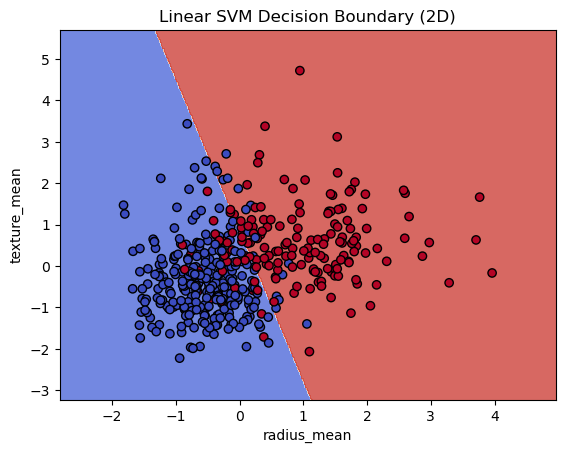

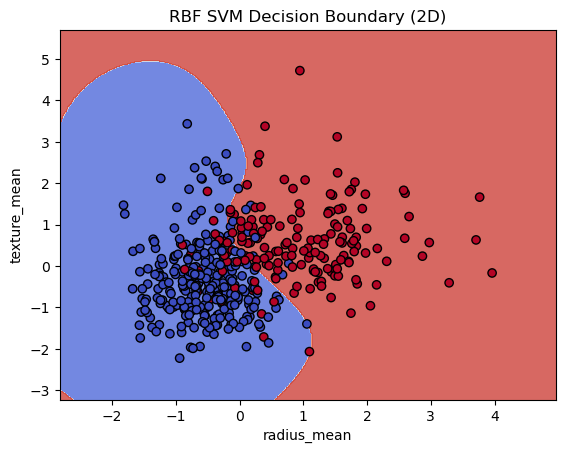

Best Parameters from GridSearch: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Cross-validation Accuracy Scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]
Mean CV Accuracy: 97.89%


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

df = pd.read_csv("breast.csv")
df = df.dropna()  
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

features = ['radius_mean', 'texture_mean']  
X_vis = df[features]
y = df['diagnosis']

X = df.drop('diagnosis', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_linear = SVC(kernel='linear')
model_linear.fit(X_train_full, y_train)

model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train_full, y_train)

def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title(title)
    plt.show()

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

scaler_vis = StandardScaler()
X_train_vis_scaled = scaler_vis.fit_transform(X_train_vis)
X_test_vis_scaled = scaler_vis.transform(X_test_vis)

model_2d_linear = SVC(kernel='linear')
model_2d_linear.fit(X_train_vis_scaled, y_train_vis)

model_2d_rbf = SVC(kernel='rbf')
model_2d_rbf.fit(X_train_vis_scaled, y_train_vis)

plot_decision_boundary(model_2d_linear, pd.DataFrame(X_train_vis_scaled, columns=features), y_train_vis, "Linear SVM Decision Boundary (2D)")
plot_decision_boundary(model_2d_rbf, pd.DataFrame(X_train_vis_scaled, columns=features), y_train_vis, "RBF SVM Decision Boundary (2D)")

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_scaled, y)

print("Best Parameters from GridSearch:", grid.best_params_)

cv_scores = cross_val_score(SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma']),
                            X_scaled, y, cv=5)
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
